<a href="https://colab.research.google.com/github/EWataaru/Descriptive-statistics/blob/main/Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion - Accessibility to or use a commercial bank accounts in Kenya, Rwanda, Tanzania and Uganda

## i. Defining the Question

### 1) Specifying the Data Analytic Question

To determine the relationship betweeen social-economic factors and having a bank account as an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda.

### 2) Defining the Metric for Success

The goal is to predict which individuals are most likely to have or use a bank account as an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda.

We will also to identify the key demographic factors that might drive individuals’ financial outcomes.

### 3) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services.

Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### 4) Recording the Experimental Design

We will perform descriptive statistical analysis to summarize and draw conclusions about the data.


Data Understanding

Data Preparation

Modeling

Evaluation

Recommendations

### 5) Data Relevance

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here

1.   https://www.fsdkenya.org/blogs-publications/publications/2018-annual-report/

2.   http://www.statistics.gov.rw/publication/finscope-rwanda-2016

3.  https://www.fsdt.or.tz/finscope/

4.  https://fsduganda.or.ug/finscope-2018-survey-report/



## ii. Reading the Data

In [446]:
# Loading the Data from the source
# ---
# Dataset url = https://bit.ly/FinancialDataset
# ---
# Variable Definitions:
# country - Country interviewee is in.
# year - Year survey was done in.
# uniqueid - Unique identifier for each interviewee
# location_type - Type of location: Rural, Urban
# cellphone_access - If interviewee has access to a cellphone: Yes, No
# household_size - Number of people living in one house
# age_of_respondent - The age of the interviewee
# gender_of_respondent - Gender of interviewee: Male, Female
# relationship_with_head - The interviewee‚Äôs relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
# marital_status - The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don‚Äôt know
# education_level - Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
# job_type - Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer


In [447]:
# Importing Libraries
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

# sns.set_style()
sns.set_style('whitegrid')

In [448]:
# Loading dataset

FD = pd.read_csv('https://bit.ly/FinancialDataset')


In [449]:
# Determining the no. of records in our dataset
FD.shape

(23524, 13)

In [450]:
# Previewing the top of our dataset
FD.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [451]:
# Previewing the bottom of our dataset
FD.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [452]:
# Checking whether each column has an appropriate datatype
FD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## iii. Tidying the Dataset

### Identifying and dealing with missing data

In [453]:
# Checking for missing values in the dataset
FD.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [454]:
#propotion of the data that has missing values
((FD.isnull().sum().sum())/FD.shape[0])*100

1.1350110525420847

In [455]:
# we drop any record with a missing value
#
FD_DATA = FD.dropna()

In [456]:
FD_DATA.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [457]:
FD_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [458]:
#renaming column headers to rectify the typos
FD_DATA.rename(columns={'Has a Bank account':'Has_a_Bank_account', 'Type of Location':'Type_of_Location','Cell Phone Access':'Cell_Phone_Access','Respondent Age':'Respondent_Age','The relathip with head': 'relationship_with_head', 'Level of Educuation':'level_of_education', 'Type of Job':'Type_of_Job'}, inplace = True)
FD_DATA.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['country', 'year', 'uniqueid', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'Type_of_Job'],
      dtype='object')

In [459]:
# Rename columns to have standard column names
col_names = FD_DATA.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

FD_DATA.columns = col_names
FD_DATA.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [460]:
# Changing household_size data type to integer
FD_DATA['household_size'] = FD_DATA['household_size'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [461]:
# Changing categories dtypes
#
FD_DATA['country'] = FD_DATA['country'].astype(str)
FD_DATA['uniqueid'] = FD_DATA['uniqueid'].astype(str)
FD_DATA['has_a_bank_account'] = FD_DATA['has_a_bank_account'].astype(str)
FD_DATA['type_of_location'] = FD_DATA['type_of_location'].astype(str)
FD_DATA['cell_phone_access'] = FD_DATA['cell_phone_access'].astype(str)
FD_DATA['gender_of_respondent'] = FD_DATA['gender_of_respondent'].astype(str)
FD_DATA['relationship_with_head'] = FD_DATA['relationship_with_head'].astype(str)
FD_DATA['marital_status'] = FD_DATA['marital_status'].astype(str)
FD_DATA['level_of_education'] = FD_DATA['level_of_education'].astype(str)
FD_DATA['type_of_job'] = FD_DATA['type_of_job'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [462]:
FD_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   has_a_bank_account      23343 non-null  object 
 4   type_of_location        23343 non-null  object 
 5   cell_phone_access       23343 non-null  object 
 6   household_size          23343 non-null  int64  
 7   respondent_age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   relationship_with_head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  level_of_education      23343 non-null  object 
 12  type_of_job             23343 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.5+ MB


### Checking for and dealing with outliers

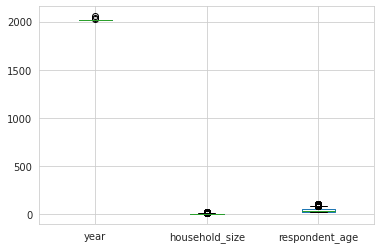

In [463]:
FD_DATA.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


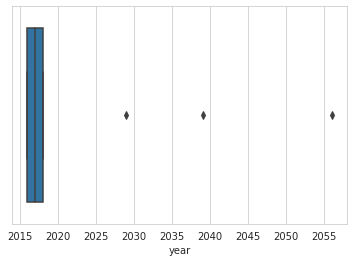

In [464]:
sns.boxplot(FD_DATA.year)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


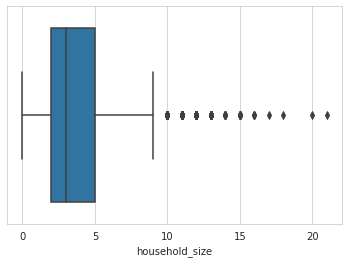

In [465]:
sns.boxplot(FD_DATA.household_size)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


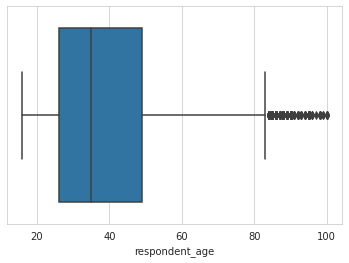

In [466]:
sns.boxplot(FD_DATA.respondent_age)

In [467]:
# DEALING WITH THE OUTLIERS

# IQR Score 
# Anything not in the range of 
# (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.


# Indicating the 1st and 3rd quantiles and the IQR

Q1 = FD_DATA.quantile(0.25)
Q3 = FD_DATA.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'FD_DATA1'

FD_DATA_ = FD_DATA[~((FD_DATA < (Q1 - 1.5 * IQR)) | (FD_DATA > (Q3 + 1.5 * IQR))).any(axis=1)]

# Dataset after removing the outliers

print(FD_DATA_.shape)

# Dataset with outliers

print(FD_DATA.shape)

(22725, 13)
(23343, 13)


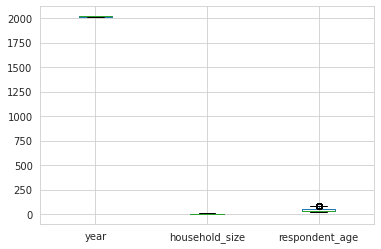

In [468]:
FD_DATA_.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


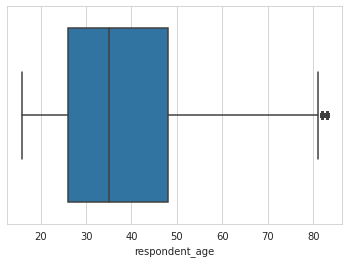

In [469]:
#print(sns.boxplot(FD_DATA1.year))
#print(sns.boxplot(FD_DATA1.household_size))
print(sns.boxplot(FD_DATA_.respondent_age))

### Checking for Anomalies

In [470]:
print(FD_DATA_['year'].value_counts())

print(FD_DATA_['level_of_education'].value_counts())

print(FD_DATA_['cell_phone_access'].value_counts())

print(FD_DATA_['household_size'].value_counts())

print(FD_DATA_['has_a_bank_account'].value_counts())

print(FD_DATA_['type_of_location'].value_counts())

print(FD_DATA_['country'].value_counts())

print(FD_DATA_['marital_status'].value_counts())

print(FD_DATA_['type_of_job'].value_counts())

print(FD_DATA_['respondent_age'].value_counts())

print(FD_DATA_['gender_of_respondent'].value_counts())

print(FD_DATA_['relationship_with_head'].value_counts())


2016    8512
2018    7789
2017    6424
Name: year, dtype: int64
Primary education                  12443
No formal education                 4232
Secondary education                 4100
Tertiary education                  1134
Vocational/Specialised training      785
6                                     25
Other/Dont know/RTA                    6
Name: level_of_education, dtype: int64
Yes    16985
No      5740
Name: cell_phone_access, dtype: int64
2    5008
1    3847
3    3474
4    3178
5    2704
6    2020
7    1374
8     740
9     353
0      27
Name: household_size, dtype: int64
No     19490
Yes     3235
Name: has_a_bank_account, dtype: int64
Rural    13810
Urban     8915
Name: type_of_location, dtype: int64
Rwanda      8512
Tanzania    6424
Kenya       5868
Uganda      1921
Name: country, dtype: int64
Married/Living together    10431
Single/Never Married        7748
Widowed                     2509
Divorced/Seperated          2029
Dont know                      8
Name: marital_stat

In [471]:
FD_DATA1 = FD_DATA_[(FD_DATA_['level_of_education'] != "6")]

In [472]:
FD_DATA1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22700 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22700 non-null  object 
 1   year                    22700 non-null  int64  
 2   uniqueid                22700 non-null  object 
 3   has_a_bank_account      22700 non-null  object 
 4   type_of_location        22700 non-null  object 
 5   cell_phone_access       22700 non-null  object 
 6   household_size          22700 non-null  int64  
 7   respondent_age          22700 non-null  float64
 8   gender_of_respondent    22700 non-null  object 
 9   relationship_with_head  22700 non-null  object 
 10  marital_status          22700 non-null  object 
 11  level_of_education      22700 non-null  object 
 12  type_of_job             22700 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.4+ MB


In [473]:
print(FD_DATA1['level_of_education'].value_counts())

Primary education                  12443
No formal education                 4232
Secondary education                 4100
Tertiary education                  1134
Vocational/Specialised training      785
Other/Dont know/RTA                    6
Name: level_of_education, dtype: int64


## iii. Descriptive Analysis 

#### 1. Univariate Analysis

In [474]:
# Showing the descriptive statistics for the numerical measures
#
FD_DATA1.describe()

,year,household_size,respondent_age
count,22700.000000,22700.000000,22700.000000
mean,2016.968678,3.579868,38.334714
std,0.846278,2.080479,15.797801
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,9.000000,83.000000


In [535]:
FD_DATA1['household_size'].skew()

0.606110414061203

In [536]:
FD_DATA1['respondent_age'].skew()

0.7406257530452783

In [537]:
FD_DATA1['household_size'].kurt()

-0.504804932649868

In [538]:
FD_DATA1['respondent_age'].kurt()

-0.2359419668569922

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

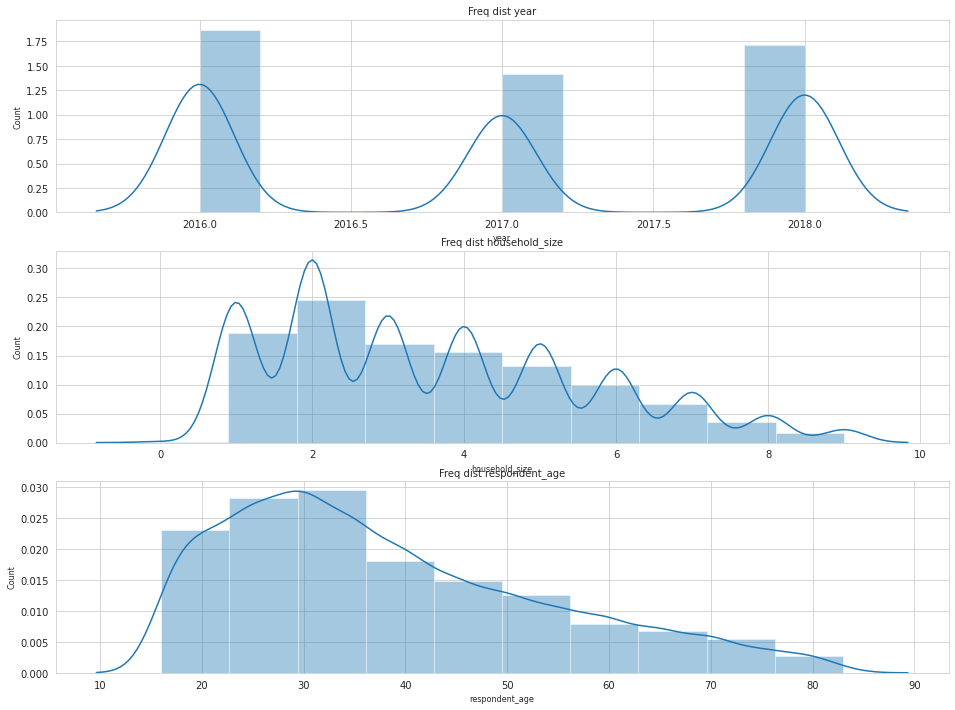

In [475]:
#Plotting the univariate distribution of the numerical measures

col_names = ['year', 'household_size', 'respondent_age']
fig, ax = plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
  sns.distplot(FD_DATA1[col_val], ax=ax[i], bins=10, hist=True)
  ax[i].set_title('Freq dist '+col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel('Count', fontsize=8)

plt.show()

Rwanda      8495
Tanzania    6421
Kenya       5868
Uganda      1916
Name: country, dtype: int64


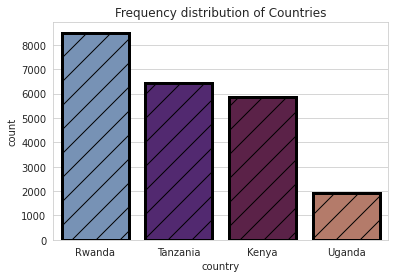

In [476]:
print(FD_DATA1.country.value_counts())
FD_DATA1.country.value_counts().index
sns.countplot(x= 'country', data=FD_DATA1, order=FD_DATA1.country.value_counts().index,
palette='twilight',ec='black',hatch='/',lw=3)
plt.title("Frequency distribution of Countries" )
plt.show()

No     19470
Yes     3230
Name: has_a_bank_account, dtype: int64


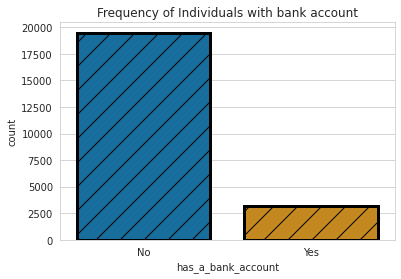

In [477]:
print(FD_DATA1.has_a_bank_account.value_counts())
FD_DATA1.has_a_bank_account.value_counts().index
sns.countplot(x= 'has_a_bank_account', data=FD_DATA1, order=FD_DATA1.has_a_bank_account.value_counts().index,
palette='colorblind',ec='black',hatch='/',lw=3)
plt.title("Frequency of Individuals with bank account" )
plt.show()

Rural    13796
Urban     8904
Name: type_of_location, dtype: int64


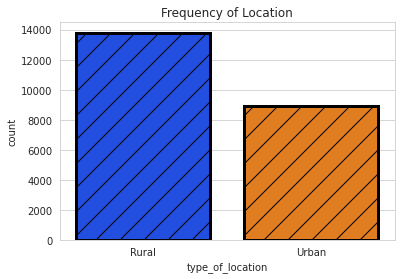

In [478]:
print(FD_DATA1.type_of_location.value_counts())
FD_DATA1.type_of_location.value_counts().index
sns.countplot(x= 'type_of_location', data=FD_DATA1, order=FD_DATA1.type_of_location.value_counts().index,
palette='bright',ec='black',hatch='/',lw=3)
plt.title("Frequency of Location" )
plt.show()

Yes    16969
No      5731
Name: cell_phone_access, dtype: int64


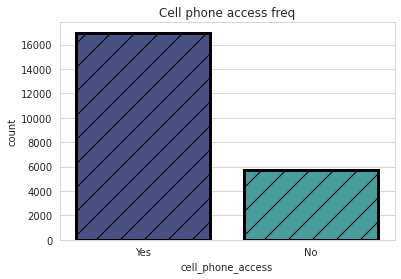

In [479]:
print(FD_DATA1.cell_phone_access.value_counts())
FD_DATA1.cell_phone_access.value_counts().index
sns.countplot(x= 'cell_phone_access', data=FD_DATA1, order=FD_DATA1.cell_phone_access.value_counts().index,
palette='mako',ec='black',hatch='/',lw=3)
plt.title("Cell phone access freq" )
plt.show()

Female    13379
Male       9321
Name: gender_of_respondent, dtype: int64


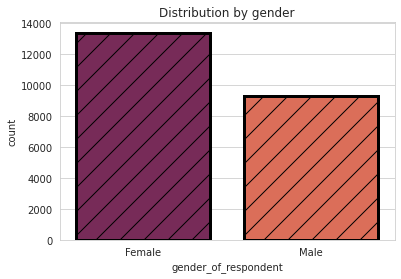

In [480]:
print(FD_DATA1.gender_of_respondent.value_counts())
FD_DATA1.gender_of_respondent.value_counts().index
sns.countplot(x= 'gender_of_respondent', data=FD_DATA1, order=FD_DATA1.gender_of_respondent.value_counts().index,
palette='rocket',ec='black',hatch='/',lw=3)
plt.title("Distribution by gender" )
plt.show()

Head of Household      12388
Spouse                  6350
Child                   2131
Parent                  1011
Other relative           640
Other non-relatives      180
Name: relationship_with_head, dtype: int64


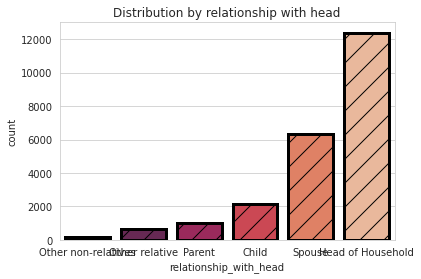

In [481]:
print(FD_DATA1.relationship_with_head.value_counts())
FD_DATA1.relationship_with_head.value_counts().index
sns.countplot(x= 'relationship_with_head', data=FD_DATA1, order=FD_DATA1.relationship_with_head.value_counts().index[::-1],
palette='rocket',ec='black',hatch='/',lw=3 )
plt.title("Distribution by relationship with head" )
plt.show()

Married/Living together    10416
Single/Never Married        7746
Widowed                     2503
Divorced/Seperated          2027
Dont know                      8
Name: marital_status, dtype: int64


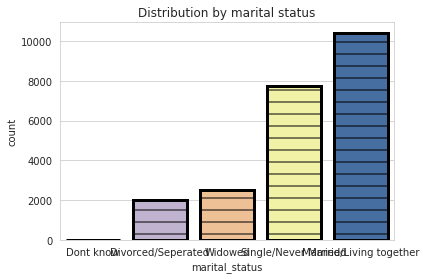

In [482]:
print(FD_DATA1.marital_status.value_counts())
FD_DATA1.marital_status.value_counts().index
sns.countplot(x= 'marital_status', data=FD_DATA1, order=FD_DATA1.marital_status.value_counts().index[::-1],
palette='Accent',ec='black',hatch='-',lw=3)
plt.title("Distribution by marital status" )
plt.show()

Primary education                  12443
No formal education                 4232
Secondary education                 4100
Tertiary education                  1134
Vocational/Specialised training      785
Other/Dont know/RTA                    6
Name: level_of_education, dtype: int64


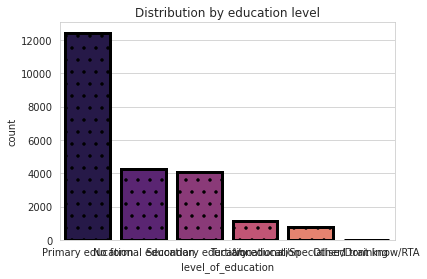

In [483]:
print(FD_DATA1.level_of_education.value_counts())
FD_DATA1.level_of_education.value_counts().index
sns.countplot(x= 'level_of_education', data=FD_DATA1, order=FD_DATA1.level_of_education.value_counts().index,
palette='magma',ec='black',hatch='.',lw=3)
plt.title("Distribution by education level" )
plt.show()

Self employed                   6206
Informally employed             5476
Farming and Fishing             5296
Remittance Dependent            2373
Formally employed Private       1034
Other Income                    1025
No Income                        582
Formally employed Government     382
Government Dependent             208
Dont Know/Refuse to answer       118
Name: type_of_job, dtype: int64


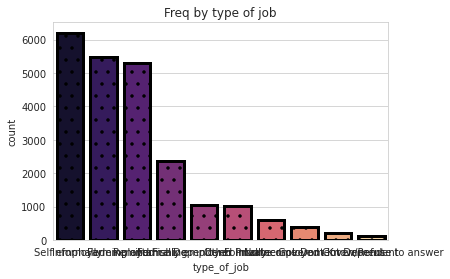

In [484]:
print(FD_DATA1.type_of_job.value_counts())
FD_DATA1.type_of_job.value_counts().index
sns.countplot(x= 'type_of_job', data=FD_DATA1, order=FD_DATA1.type_of_job.value_counts().index,
palette='magma',ec='black',hatch='.',lw=3)
plt.title("Freq by type of job" )
plt.show()

#### 2. Bivariate Analysis

Numerical and Numerical

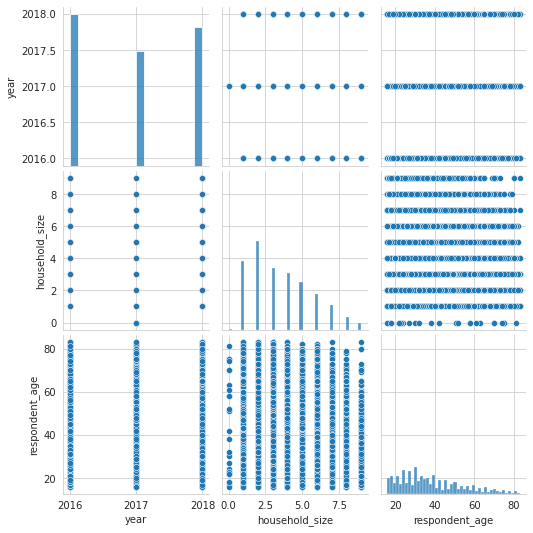

In [485]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(FD_DATA1)
plt.show()

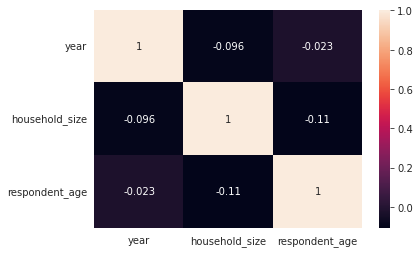

In [486]:
sns.heatmap(FD_DATA1.corr(),annot=True)
plt.show()

Calculating the pearson correlation coefficient

Correlation coefficients between -.20 and .20 are generally considered weak, 

between .20 and .50 (positive or negative) are considered moderate, 

above .50 (positive or negative) are considered strong. 

In [487]:
#Calculating Correlation coefficients of household_size and year

# Checking whether you have to define the pearson
coeff = FD_DATA1["household_size"].corr(FD_DATA1["year"]) 
print(coeff)

-0.09647648821961918


In [488]:
#Calculating Correlation coefficients of household_size and Respondent_Age

pearson_coeff = FD_DATA1["household_size"].corr(FD_DATA1["respondent_age"], method="pearson") 
print(pearson_coeff)


-0.10592193374201107


In [489]:
#Calculating Correlation coefficients of year and Respondent_Age

pearson_coeff = FD_DATA1["year"].corr(FD_DATA1["respondent_age"], method="pearson") 
print(pearson_coeff)


-0.02273373140543905


In [490]:
FD_DATA1.corr()

,year,household_size,respondent_age
year,1.000000,-0.096476,-0.022734
household_size,-0.096476,1.000000,-0.105922
respondent_age,-0.022734,-0.105922,1.000000


At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

Did we have the right data?

Do we need other data to answer our question?

Did we have the right question?

Categorical and categorical

has_a_bank_account    No   Yes
country                       
Kenya               4377  1491
Rwanda              7519   976
Tanzania            5824   597
Uganda              1750   166


Text(0.5, 1.0, 'Has_a_Bank_account by Country')

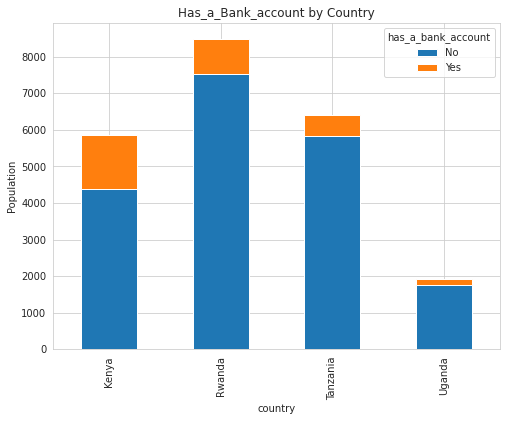

In [491]:
#We create a stacked bar chart through the use of the pyplot.bar() function to visualize the relationship between two categorical variables

country_account=pd.crosstab(index=FD_DATA1['country'], columns=FD_DATA1['has_a_bank_account'],margins_name='Total')
print(country_account)

country_account.plot(kind='bar', figsize=(8, 6), stacked=True)

plt.ylabel("Population")

plt.title("Has_a_Bank_account by Country")

has_a_bank_account                  No   Yes
level_of_education                          
No formal education               4071   161
Other/Dont know/RTA                  0     6
Primary education                11382  1061
Secondary education               3132   968
Tertiary education                 550   584
Vocational/Specialised training    335   450


Text(0.5, 1.0, 'Has a Bank account by level of education')

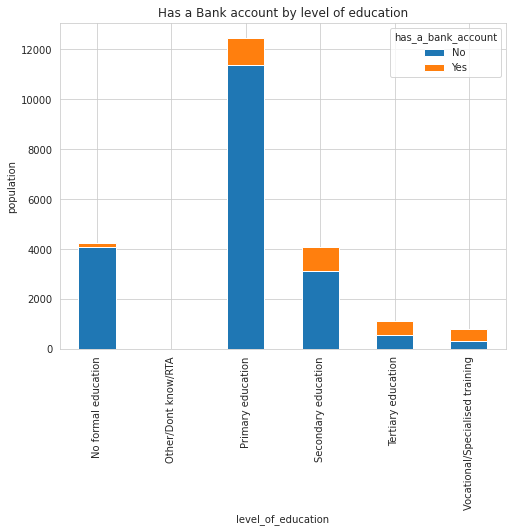

In [492]:
#We create a stacked bar chart through the use of the pyplot.bar() function to visualize the relationship between two categorical variables

ed_account=pd.crosstab(index=FD_DATA1['level_of_education'], columns=FD_DATA1['has_a_bank_account'],margins_name='Total')
print(ed_account)

ed_account.plot(kind='bar', figsize=(8, 6), stacked=True)

plt.ylabel("population")

plt.title("Has a Bank account by level of education")

#### 3. Multivariate Analysis

1.   PCA
2.   FACTOR ANALYSIS
3.   LDA



**PCA**




In [493]:
FD_DATA1.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [494]:
#Preprocessing
X = FD_DATA1.drop('has_a_bank_account', 1)
y = FD_DATA1['has_a_bank_account']

In [495]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [496]:
#Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit(FD_DATA1[['household_size', 'respondent_age']])
X_test = sc.transform(FD_DATA1[['household_size', 'respondent_age']])

In [497]:
X_test = pd.DataFrame(X_test)

In [498]:
FD_DATA2 = X_test.fillna(0)

In [499]:
# Applying PCA
from sklearn.decomposition import PCA
FD_DATA2pca = PCA(n_components=2)
principalComponents_FD_DATA2 = FD_DATA2pca.fit_transform(FD_DATA2)

In [500]:
#Explained Variance Ratio
explained_variance = FD_DATA2pca.explained_variance_ratio_
explained_variance


array([0.55296097, 0.44703903])

In [501]:
# Applying PCA 1 component
from sklearn.decomposition import PCA
FD_DATA2pca1 = PCA(n_components=1)
principalComponents_FD_DATA2_1 = FD_DATA2pca1.fit_transform(FD_DATA2)

In [502]:
#Explained Variance Ratio
explained_variance = FD_DATA2pca1.explained_variance_ratio_
explained_variance


array([0.55296097])

**FACTOR ANALYSIS**

In [503]:
# Dataset columns
FD_DATA1.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [504]:
# Dropping unnecessary columns 
FD_DATA3 = FD_DATA1.drop(['uniqueid', 'relationship_with_head','has_a_bank_account', 'type_of_location','cell_phone_access','country','year','gender_of_respondent','marital_status', 'level_of_education','type_of_job' ],axis=1)


In [505]:
# Datatypes
FD_DATA3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22700 entries, 0 to 23522
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   household_size  22700 non-null  int64  
 1   respondent_age  22700 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [506]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(FD_DATA3)
chi_square_value, p_value

(256.0929167643763, 6.121262162069918e-58)

In [507]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(FD_DATA3)

In [508]:
# Choosing the Number of Factors
# Kaiser criterion and scree plot
# 
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(FD_DATA3, 2, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.105922
1,0.894078


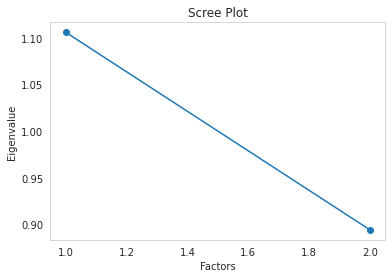

In [509]:
plt.scatter(range(1,FD_DATA3.shape[1]+1),ev)
plt.plot(range(1,FD_DATA3.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [510]:
#Factor analysis
fa = FactorAnalyzer()
fa.analyze(FD_DATA3, 2, rotation="varimax")
fa.loadings

,Factor1,Factor2
household_size,-0.325457,0.00005
respondent_age,0.325457,0.00005


In [511]:
# Variance of each factor
fa.get_factor_variance()

,Factor1,Factor2
SS Loadings,0.211844,4.967048e-09
Proportion Var,0.105922,2.483524e-09
Cumulative Var,0.105922,1.059219e-01


**LDA**

In [512]:
# Preview data
FD_DATA1.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [527]:
# Drop columns 
FD_DATA4 = FD_DATA1.drop(['uniqueid', 'relationship_with_head', 'type_of_location','cell_phone_access','country','year','gender_of_respondent','marital_status', 'level_of_education','type_of_job' ],axis=1)
FD_DATA4.head()

,has_a_bank_account,household_size,respondent_age
0,Yes,3,24.0
1,No,5,70.0
2,Yes,5,26.0
3,No,5,34.0
4,No,8,26.0


In [528]:
# Divide data into labels and feature set

X = FD_DATA4.iloc[:, 1:3].values
y = FD_DATA4.iloc[:, 0].values

In [529]:
# Divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [530]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [531]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [532]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [533]:
# Evaluating the Performance of the algorithm and accuracy of the prediction

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3897    0]
 [ 643    0]]
Accuracy0.8583700440528634
